In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

#### Load the data into a DataFrame

In [2]:
data_df = pd.read_csv("C:/Users/drdav\Downloads/Reviews(1).csv")
data_df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

Shape gives information on the structure of the DataFrame. It implies that the DataFrame data_df has 568454 rows and 10 columns. This information is useful for understanding the size and structure of the dataset.

In [3]:
data_df.shape

(568454, 10)

In [4]:
data_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
data_df['ProductId'].value_counts().nlargest(20)

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
B001RVFEP2    564
B001RVFERK    564
B007M832YY    564
B0026KPDG8    564
B006HYLW32    564
B0013NUGDE    564
B000KV7ZGQ    556
B000KV61FC    556
B0013A0QXC    542
B005K4Q37A    542
Name: ProductId, dtype: int64

The above retrieves the 20 most common values in the 'ProductId' column of the DataFrame, along with their respective counts. This operation is useful for identifying the most frequently occurring product IDs in the dataset, which can provide insights into the popularity or distribution of products within the dataset.

In [9]:
Product_df = data_df.loc[data_df['ProductId'] == 'B0026KPDG8'].copy()
Product_df.head(10)

Id   ProductId          UserId               ProfileName  \
413542  413543  B0026KPDG8  A21SYVGVNG8RAS         Jennifer Sullivan   
413543  413544  B0026KPDG8   AQJYXC0MPRQJL                 B. Perrin   
413544  413545  B0026KPDG8  A30NYUHEDLWI0Y           Miriam "Miriam"   
413545  413546  B0026KPDG8  A2NU55U9LKTB5J                  divarett   
413546  413547  B0026KPDG8  A225F7QFP5LIW2                      ccde   
413547  413548  B0026KPDG8   AWB39CSUQXSB3        April "Lighthouse"   
413548  413549  B0026KPDG8  A1BZEHZ038EUL2           NurseLovesDeals   
413549  413550  B0026KPDG8   A8E9ZAG5Y5RKH                stephchows   
413550  413551  B0026KPDG8  A3W0GMJ0FYSW3J  Alicia "Bonita Morenita"   
413551  413552  B0026KPDG8  A2HYHT45PHNIIG           Aramat "Aramat"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
413542                     1                       1      5  1298851200   
413543                     1                       1      5  1298851200   
413544                     1                       1      5  1291852800   
413545                     1                       1      3  1286928000   
413546                     1                       1      5  1286236800   
413547                     1                       1      2  1286064000   
413548                     1                       1      5  1284336000   
413549                     1                       1      5  1283817600   
413550                     1                       1      5  1283212800   
413551                     1                       1      5  1283040000   

                                           Summary  \
413542                               Yummy snacks!   
413543  Great chip that is different from the rest   
413544          Great  Alternative to Potato Chips   
413545                  Not somthing I would crave   
413546                       healthy and delicious   
413547                          On the strong side   
413548                                 Love these!   
413549                                  Like crack   
413550             Awesome healthIER snack option!   
413551                                  Great Chip   

                                                     Text  
413542  Popchips are the bomb!!  I use the parmesan ga...  
413543  I like the puffed nature of this chip that mak...  
413544  I just love these chips!  I was always a big f...  
413545  These tasted like potatoe stix, that we got in...  
413546  These chips are great!  They look almost like ...  
413547  The flavors of these are a bit on the strong s...  
413548  I love this brand of chips. By far, I like the...  
413549  These things are like crack, I can't stop eati...  
413550  I first had Popchips last week at a local deli...  
413551  Our local TJ's used to carry these, but no mor...

Then we create a new DataFrame Product_df containing only the rows from the original DataFrame data_df where the 'ProductId' column has the value 'B0026KPDG8'. The .copy() method is used to ensure that the new DataFrame is a separate copy in memory and not just a view of the original data. This allows for independent manipulation of the new DataFrame without affecting the original data.

In [10]:
Product_df.reset_index(inplace=True, drop=True)
Product_df.head()

Id   ProductId          UserId        ProfileName  \
0  413543  B0026KPDG8  A21SYVGVNG8RAS  Jennifer Sullivan   
1  413544  B0026KPDG8   AQJYXC0MPRQJL          B. Perrin   
2  413545  B0026KPDG8  A30NYUHEDLWI0Y    Miriam "Miriam"   
3  413546  B0026KPDG8  A2NU55U9LKTB5J           divarett   
4  413547  B0026KPDG8  A225F7QFP5LIW2               ccde   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1298851200   
1                     1                       1      5  1298851200   
2                     1                       1      5  1291852800   
3                     1                       1      3  1286928000   
4                     1                       1      5  1286236800   

                                      Summary  \
0                               Yummy snacks!   
1  Great chip that is different from the rest   
2          Great  Alternative to Potato Chips   
3                  Not somthing I would crave   
4                       healthy and delicious   

                                                Text  
0  Popchips are the bomb!!  I use the parmesan ga...  
1  I like the puffed nature of this chip that mak...  
2  I just love these chips!  I was always a big f...  
3  These tasted like potatoe stix, that we got in...  
4  These chips are great!  They look almost like ...

Now we assign the value of the 'Text' column from the 100th row of the DataFrame Product_df to the variable example. This means that example now holds the text data from the 'Text' column of the 100th row in Product_df

In [11]:
example = Product_df['Text'][100]
print(example)

One of my biggest frustrations with doing Weight Watchers was always the problem of finding good chips.  I will eat the baked ones, but they are undeniably very different from regular fried chips.  In addition to this, I've never been able to find a baked chip that came in salt and vinegar flavor, which is my favorite type of chip.  This meant that, whenever I had the craving for this particular flavor, I'd have to eat the regular fried kind.<br /><br />I picked up an oversize bag of the barbecue flavor Pop Chips on a whim at Costco.  I'd heard about them and was curious about what they're like, but I'd never before been able to find them in the area.  Much to my surprise, my very thin husband who is totally addicted to barbecue chips loved them and pretty much ate the whole bag before I'd had any.  I had tasted a couple of them and thought the barbecue flavor was good, so I decided to go ahead and order the individual bags from Amazon in barbecue for him and sea salt and vinegar for m

The variable tokens will contain a list of individual words (tokens) extracted from the text in 'example'. These tokens can then be further analyzed or processed, such as for sentiment analysis, frequency analysis, or any other text analysis task.

In [12]:
tokens = nltk.word_tokenize(example)
print(tokens)

['One', 'of', 'my', 'biggest', 'frustrations', 'with', 'doing', 'Weight', 'Watchers', 'was', 'always', 'the', 'problem', 'of', 'finding', 'good', 'chips', '.', 'I', 'will', 'eat', 'the', 'baked', 'ones', ',', 'but', 'they', 'are', 'undeniably', 'very', 'different', 'from', 'regular', 'fried', 'chips', '.', 'In', 'addition', 'to', 'this', ',', 'I', "'ve", 'never', 'been', 'able', 'to', 'find', 'a', 'baked', 'chip', 'that', 'came', 'in', 'salt', 'and', 'vinegar', 'flavor', ',', 'which', 'is', 'my', 'favorite', 'type', 'of', 'chip', '.', 'This', 'meant', 'that', ',', 'whenever', 'I', 'had', 'the', 'craving', 'for', 'this', 'particular', 'flavor', ',', 'I', "'d", 'have', 'to', 'eat', 'the', 'regular', 'fried', 'kind.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'I', 'picked', 'up', 'an', 'oversize', 'bag', 'of', 'the', 'barbecue', 'flavor', 'Pop', 'Chips', 'on', 'a', 'whim', 'at', 'Costco', '.', 'I', "'d", 'heard', 'about', 'them', 'and', 'was', 'curious', 'about', 'what', 'they', "'re", 'l

In [13]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('One', 'CD'), ('of', 'IN'), ('my', 'PRP$'), ('biggest', 'JJS'), ('frustrations', 'NNS'), ('with', 'IN'), ('doing', 'VBG'), ('Weight', 'NNP'), ('Watchers', 'NNP'), ('was', 'VBD'), ('always', 'RB'), ('the', 'DT'), ('problem', 'NN'), ('of', 'IN'), ('finding', 'VBG'), ('good', 'JJ'), ('chips', 'NNS'), ('.', '.'), ('I', 'PRP'), ('will', 'MD'), ('eat', 'VB'), ('the', 'DT'), ('baked', 'JJ'), ('ones', 'NNS'), (',', ','), ('but', 'CC'), ('they', 'PRP'), ('are', 'VBP'), ('undeniably', 'RB'), ('very', 'RB'), ('different', 'JJ'), ('from', 'IN'), ('regular', 'JJ'), ('fried', 'VBN'), ('chips', 'NNS'), ('.', '.'), ('In', 'IN'), ('addition', 'NN'), ('to', 'TO'), ('this', 'DT'), (',', ','), ('I', 'PRP'), ("'ve", 'VBP'), ('never', 'RB'), ('been', 'VBN'), ('able', 'JJ'), ('to', 'TO'), ('find', 'VB'), ('a', 'DT'), ('baked', 'JJ'), ('chip', 'NN'), ('that', 'WDT'), ('came', 'VBD'), ('in', 'IN'), ('salt', 'NN'), ('and', 'CC'), ('vinegar', 'NN'), ('flavor', 'NN'), (',', ','), ('which', 'WDT'), ('is', 'VBZ')

The pos_tag provides valuable linguistic information about the text, which can be used to extract meaning or infer relationships between words, where each tuple consists of a token from the original text and its corresponding part of speech tag.

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores('I enjoyed my studies at St Lawrence College')

{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}

In [18]:
sia.polarity_scores('Found myself with people I cannot wait to be free from')

{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

In [19]:
for index, row in Product_df.iterrows():
    text = row['Text']
    score = sia.polarity_scores(text)
    Product_df.loc[index,['neg']] = score['neg']
    Product_df.loc[index,['pos']] = score['pos']
    Product_df.loc[index,['neu']] = score['neu']
    Product_df.loc[index,['compound']] = score['compound']

In [20]:
Product_df.head()

Id   ProductId          UserId        ProfileName  \
0  413543  B0026KPDG8  A21SYVGVNG8RAS  Jennifer Sullivan   
1  413544  B0026KPDG8   AQJYXC0MPRQJL          B. Perrin   
2  413545  B0026KPDG8  A30NYUHEDLWI0Y    Miriam "Miriam"   
3  413546  B0026KPDG8  A2NU55U9LKTB5J           divarett   
4  413547  B0026KPDG8  A225F7QFP5LIW2               ccde   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1298851200   
1                     1                       1      5  1298851200   
2                     1                       1      5  1291852800   
3                     1                       1      3  1286928000   
4                     1                       1      5  1286236800   

                                      Summary  \
0                               Yummy snacks!   
1  Great chip that is different from the rest   
2          Great  Alternative to Potato Chips   
3                  Not somthing I would crave   
4                       healthy and delicious   

                                                Text    neg    pos    neu  \
0  Popchips are the bomb!!  I use the parmesan ga...  0.000  0.407  0.593   
1  I like the puffed nature of this chip that mak...  0.021  0.102  0.877   
2  I just love these chips!  I was always a big f...  0.050  0.286  0.664   
3  These tasted like potatoe stix, that we got in...  0.000  0.224  0.776   
4  These chips are great!  They look almost like ...  0.050  0.335  0.615   

   compound  
0    0.9244  
1    0.7269  
2    0.9790  
3    0.8689  
4    0.9560

This process effectively adds sentiment analysis results to each row of the DataFrame, allowing for further analysis and insights based on sentiment.

<Axes: xlabel='pos', ylabel='Count'>

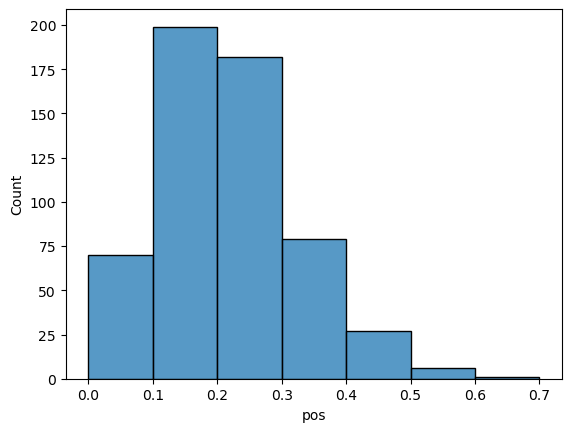

In [24]:
sns.histplot(data=Product_df,x='pos', binwidth=0.1)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

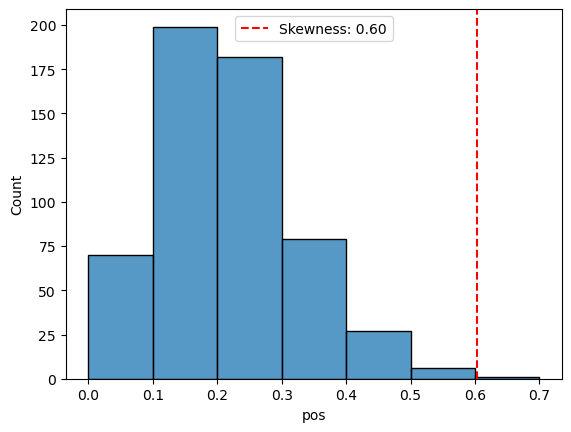

In [27]:
sns.histplot(data=Product_df,x='pos', binwidth=0.1)
skewness = skew(Product_df['pos'].dropna())
plt.axvline(x=skewness, color='r', linestyle='--', label=f'Skewness: {skewness:.2f}')
plt.legend()
plt.show()

In [30]:
mean_pos = Product_df['pos'].mean()
median_pos = Product_df['pos'].median()
mode_pos = Product_df['pos'].mode().iloc[0]
print(mean_pos, median_pos, mode_pos)

0.21401063829787234 0.204 0.0


The distribution is positively skewed, it means that the tail of the distribution extends towards the higher values, while the majority of the data points are concentrated towards the lower values. To visually confirm the positive skewness, you can observe that the mean(0.21401063829787234) is typically greater than the median(0.204), and the mode(0.0) is less than the median(0.204).

<Axes: xlabel='Score', ylabel='count'>

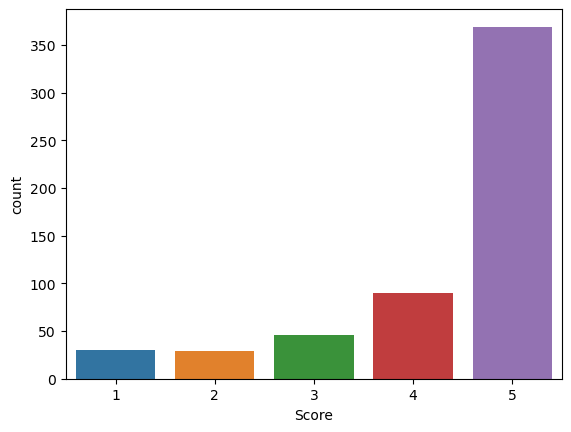

In [31]:
sns.countplot(data=Product_df, x='Score')

The count plot shows the frequency of each unique value in the 'Score' column. 

<Axes: xlabel='Score', ylabel='compound'>

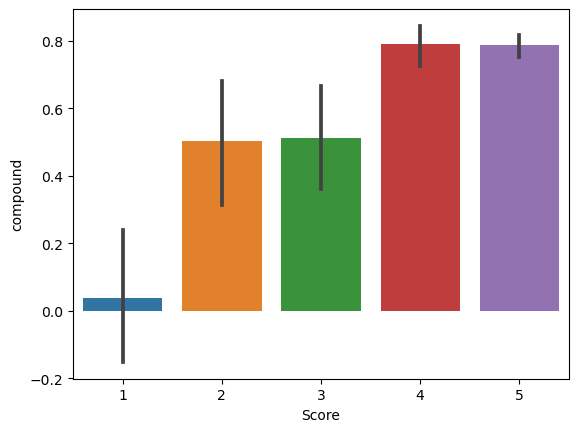

In [32]:
sns.barplot(data=Product_df, x='Score', y='compound')

Each bar in the plot corresponds to a unique 'Score' value, and the height of the bar represents the average 'compound' value for that particular score.

This visualization helps in understanding the relationship between the 'Score' and 'compound' variables. By observing the bar heights, you can identify if there are any significant differences in the compound sentiment scores across different score categories.

In [33]:
Product_df[Product_df['Score']==2]['compound'].describe()

count    29.000000
mean      0.503893
std       0.501460
min      -0.822600
25%       0.280800
50%       0.659700
75%       0.908600
max       0.989300
Name: compound, dtype: float64

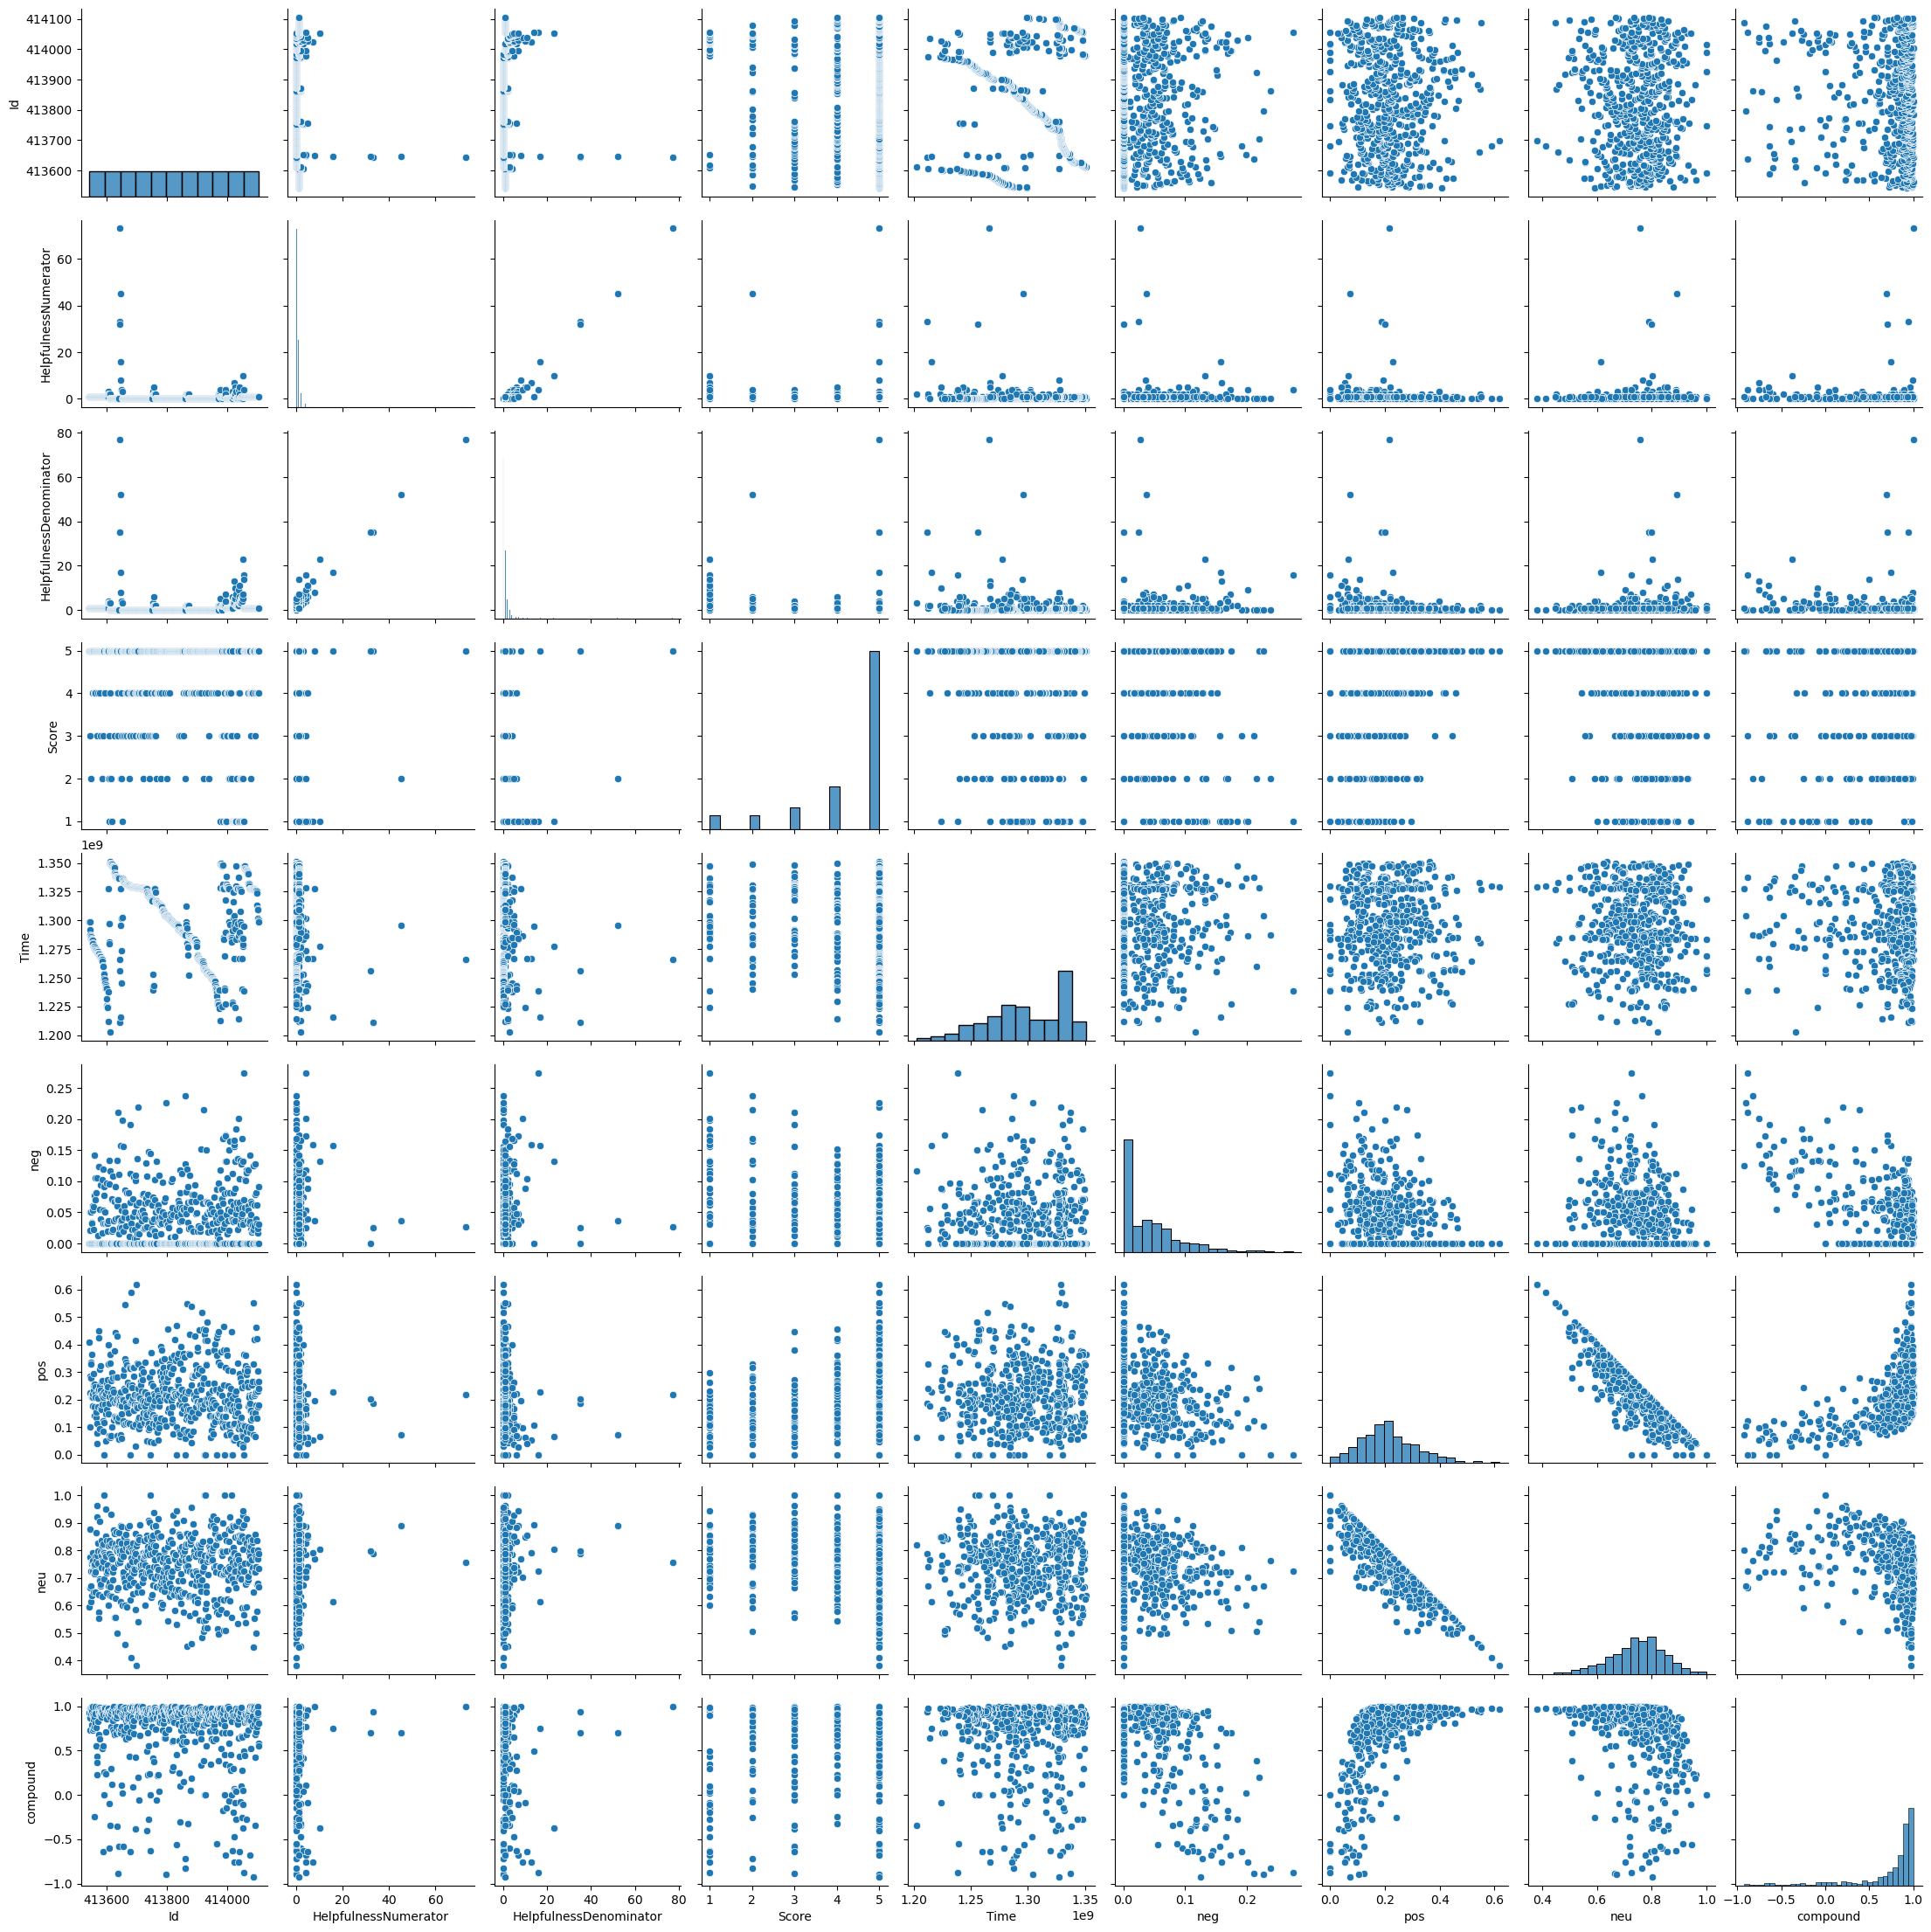

In [34]:
sns.pairplot(data=Product_df)

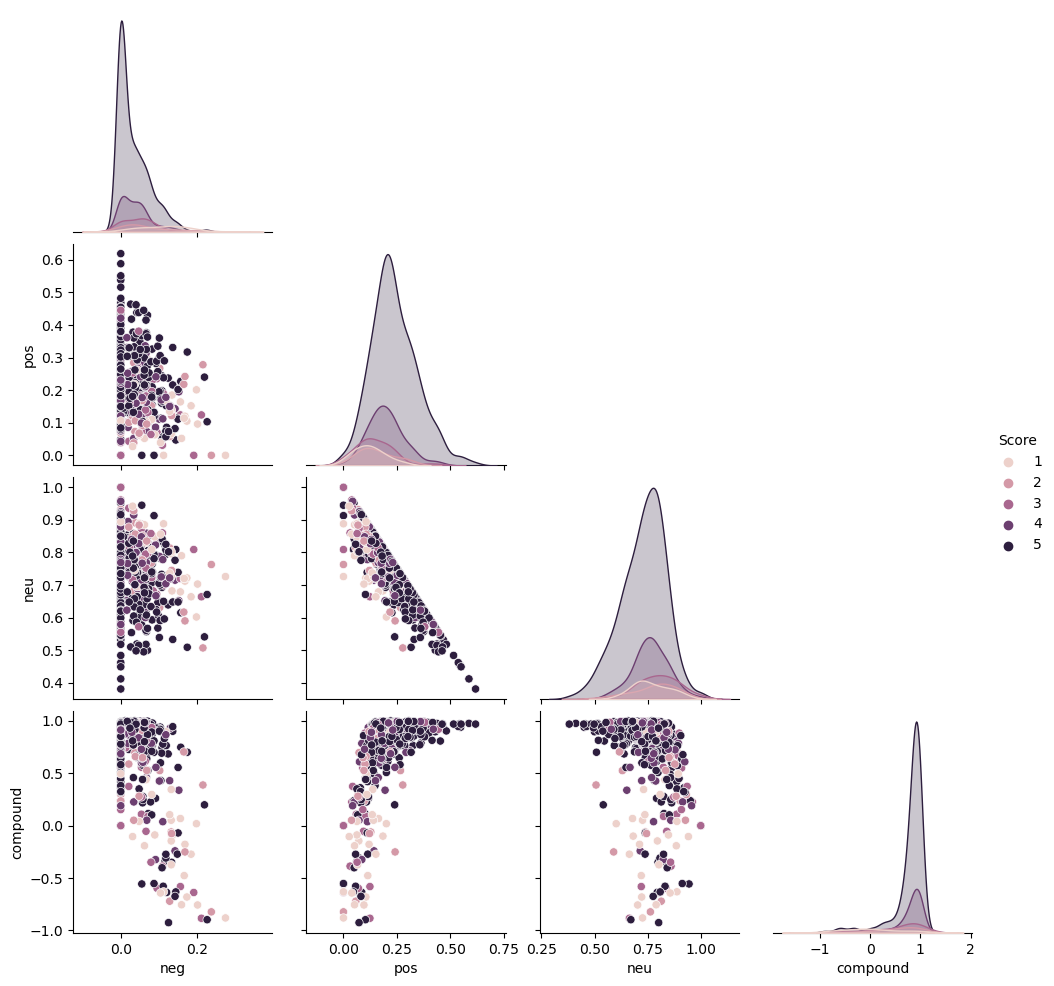

In [35]:
sns.pairplot(data=Product_df[['Score', 'neg', 'pos', 'neu', 'compound']], corner=True, hue='Score')

In [36]:
import plotly.express as px

In [37]:
px.scatter_3d(Product_df, x='pos', y='compound', z='neg', color='Score')

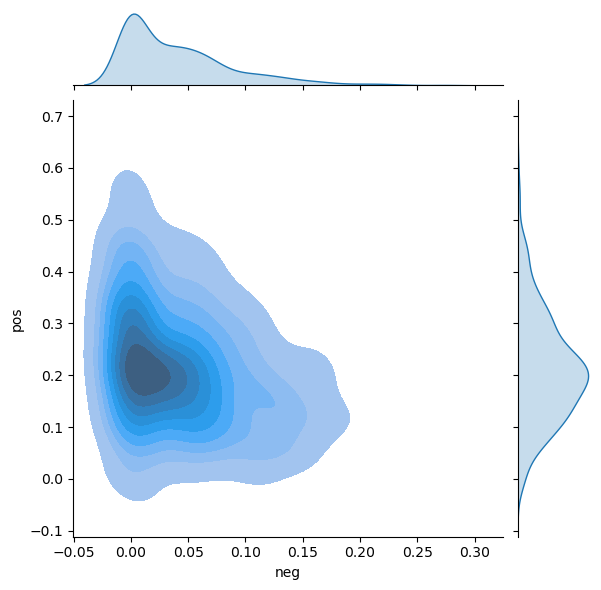

In [38]:
sns.jointplot(data=Product_df, x='neg', y='pos', kind='kde', fill=True)

In [39]:
from wordcloud import WordCloud

In [40]:
all_reviews = ''.join(text for text in Product_df['Text'])
all_reviews

'Popchips are the bomb!!  I use the parmesan garlic to scoop up cottage cheese as a healthy alternative to chips and dip.  My healthy eating program is saved.I like the puffed nature of this chip that makes it more unique in the chip market.  I ordered the Salt and Vinegar and absolutely love that flavor, hands down my favorite chip ever.  I have tried the cheddar and regular flavors as well.  The cheddar is about a 4/5 and the regular is about a 3/5 because I prefer strong flavors and obviously that would not be the case for the regular.  The Salt and Vinegar is kind of weak compared to some regular S&V chips, but is quite flavorful and makes you wanting to come back for more.I just love these chips!  I was always a big fan of potato chips, but haven\'t had one since I discovered popchips.  They are great for dipping or all alone.  I am constantly re-ordering them.  One note however-if you are on a low salt diet these chips are probably not for you. They are high in sodium.  We go thr

In [42]:
def wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

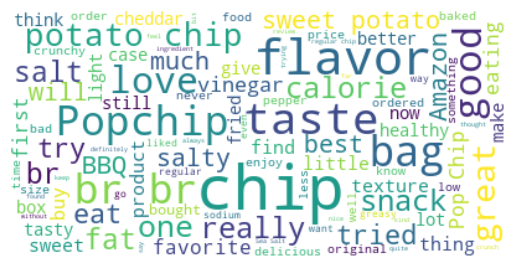

In [43]:
wordcloud(all_reviews)

In [44]:
neg_review = ''.join(text for text in Product_df.loc[Product_df['neg']>Product_df['pos'], 'Text'])
neg_review

'1. All natural. Nothing artificial in \'em. No artificial colors or flavors<br />2. Low calories for a lot o\' chips<br />3. Uber addictive taste-wise<br /><br />What more needs to be said? I\'ll be the first to admit, in spite of my being a weight loss coach in the evenings; I am not a big fan of diet food. I am a foodie. I love good food...love to cook it, love to eat it. Yet these, to me, are totally addictive. No fake diet food taste, tons of flavor. In fact, I HAVE to get them in the small bags or I will eat a whole large bag...it\'s one of those. Hickory, salty, hint of sweetness.<br /><br />They aren\'t fried or fake baked to taste fried.  They use a pressure cooker and the potatoes pop into a chip according to the bag.<br /><br />I got the automatic shipment of them from Amazon because it reduces the price by 15%and if I get 2 per month it allows for free shipping and, with the no tax, I can\'t get them in the stores that cheap and they are delivered automatically to my door t

This part of the code selects the rows from the DataFrame Product_df where the negativity score (neg) is greater than the positivity score (pos), and specifically selects the 'Text' column.

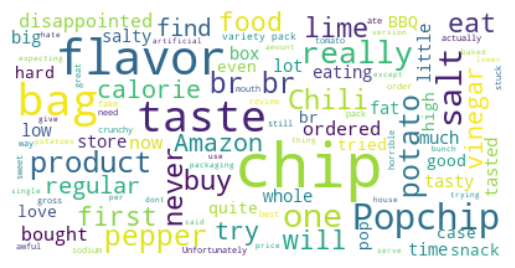

In [45]:
wordcloud(neg_review)

The word cloud highlights words that frequently appear in the negative reviews. These words provide insights into the key pain points or issues that customers have encountered with the product or service.

By examining the larger and more prominent words in the word cloud, we can identify the most significant negative aspects mentioned by customers. These keywords may include specific product features, qualities, or experiences that have received criticism.

The size and prominence of each word in the word cloud reflect its frequency of occurrence in the negative reviews. Larger words indicate that they are mentioned more frequently, suggesting that they are major pain points for customers.

The wordcloud gives visualization on the most common negative feedback from customers, providing valuable insights for businesses to address customer concerns and enhance the quality of their products or services.

In [47]:
neg_tokens = nltk.word_tokenize(neg_review)
neg_tokens

['1',
 '.',
 'All',
 'natural',
 '.',
 'Nothing',
 'artificial',
 'in',
 "'em",
 '.',
 'No',
 'artificial',
 'colors',
 'or',
 'flavors',
 '<',
 'br',
 '/',
 '>',
 '2',
 '.',
 'Low',
 'calories',
 'for',
 'a',
 'lot',
 'o',
 "'",
 'chips',
 '<',
 'br',
 '/',
 '>',
 '3',
 '.',
 'Uber',
 'addictive',
 'taste-wise',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'What',
 'more',
 'needs',
 'to',
 'be',
 'said',
 '?',
 'I',
 "'ll",
 'be',
 'the',
 'first',
 'to',
 'admit',
 ',',
 'in',
 'spite',
 'of',
 'my',
 'being',
 'a',
 'weight',
 'loss',
 'coach',
 'in',
 'the',
 'evenings',
 ';',
 'I',
 'am',
 'not',
 'a',
 'big',
 'fan',
 'of',
 'diet',
 'food',
 '.',
 'I',
 'am',
 'a',
 'foodie',
 '.',
 'I',
 'love',
 'good',
 'food',
 '...',
 'love',
 'to',
 'cook',
 'it',
 ',',
 'love',
 'to',
 'eat',
 'it',
 '.',
 'Yet',
 'these',
 ',',
 'to',
 'me',
 ',',
 'are',
 'totally',
 'addictive',
 '.',
 'No',
 'fake',
 'diet',
 'food',
 'taste',
 ',',
 'tons',
 'of',
 'flavor',
 '.',
 'In',
 'fac

By tokenizing the negative reviews, we can analyze the sentiment, extract key words, or perform other text analysis tasks to understand the content and sentiment conveyed in the reviews.

In [48]:
nouns = nltk.pos_tag(neg_tokens)
nouns
for noun in nouns:
    if noun[1]=='NN':
        print(noun[0])

lot
o
taste-wise
br
br
spite
weight
loss
coach
fan
food
foodie
food
love
food
taste
flavor
fact
bag
salty
hint
br
br
pressure
cooker
chip
bag.
br
br
shipment
price
%
month
shipping
tax
door
way.
br
lot
salt
<
br
br
grocery
order
basis
bag
order
house
box
amount
tape
case
crumbs
packaging
packaging
time
crispy
grocer
variety
pack
flavor
sodium
fat
boot
camp
challenge
something
salty
crunchy
munching
bay
product
pop
flavor
taste
chili
lime
pepper
taste
chili
food
taste
tomato
celery
reason
one
cafe
work
switch
bunch
potato
thing
plenty
potato
box
version
price
oz
clip
air
taste
smell
flavor
smell
start
flavor
whole.I
flavor
lack
flavor
case
bar-be-que
dont
deal
chip
craving
i.e
chipIt
serve
mail
waste
bag
portion
size
store.Look
idea
Taste
bag
part
lbs
phrase
product
mouth
disappointment.Just
order
bag
air
sodium.
br
cheddar
flavor
kind
cheetos
br
garlic
hand
taste
chip
cassava
whatevertheheck
kind
br
br
flavor
bag.
br
br
>
snack
chip
bag
fat
lunch
amount
salt
crunch
complaint
material
c

Then we identify and extract nouns from the tokenized negative reviews, and then iterates through the tagged tokens to identify nouns (denoted by the 'NN' tag). Finally, prints out the identified nouns from the negative reviews.

In [49]:
nouns_df = pd.DataFrame(columns=['name'])

In [50]:
for index,row in Product_df.iterrows():
    tokens = nltk.word_tokenize(row['Text'])
    for word in nltk.pos_tag(tokens):
        if word[1] == 'NN':
            nouns_df = nouns_df.append({'name' : word[0]}, ignore_index=True)

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\417551485.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\417551485.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\417551485.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\417551485.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\417551485.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [51]:
nouns_df.head(10)

name
0         bomb
1       garlic
2      cottage
3       cheese
4  alternative
5          dip
6      program
7       nature
8         chip
9         chip

In [52]:
nouns_df.value_counts()

name    
br          605
flavor      351
bag         238
potato      199
taste       176
           ... 
handfuls      1
hassle        1
head          1
healther      1
~Amy          1
Length: 1166, dtype: int64

In [53]:
nouns_df = pd.DataFrame(columns=['name'])

In [54]:
for word in nouns:
    if word[1] == 'NN':
        nouns_df = nouns_df.append({'name' : word[0]}, ignore_index=True)

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\1257800274.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\1257800274.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\1257800274.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\1257800274.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\1257800274.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [55]:
nouns_df.head(10)

name
0         lot
1           o
2  taste-wise
3          br
4          br
5       spite
6      weight
7        loss
8       coach
9         fan

In [56]:
nouns_df.value_counts()

name       
br             24
flavor         19
bag            17
taste          13
salt           12
               ..
get             1
goodness        1
grandfather     1
grocer          1
worth           1
Length: 217, dtype: int64

In [57]:
nouns_df.value_counts().nlargest()

name  
br        24
flavor    19
bag       17
taste     13
salt      12
dtype: int64

In [58]:
pareto_df = nouns_df.value_counts().rename_axis('characteristics').reset_index(name='count')
pareto_df

characteristics  count
0                br     24
1            flavor     19
2               bag     17
3             taste     13
4              salt     12
..              ...    ...
212             get      1
213        goodness      1
214     grandfather      1
215          grocer      1
216           worth      1

[217 rows x 2 columns]

#### Cleaning the extracted nouns

In [59]:
pareto_df = pareto_df.drop(pareto_df.loc[pareto_df['characteristics'].isin(['product', 'br', '<', '>', 'dog'])].index)
pareto_df

characteristics  count
1            flavor     19
2               bag     17
3             taste     13
4              salt     12
6              food      9
..              ...    ...
212             get      1
213        goodness      1
214     grandfather      1
215          grocer      1
216           worth      1

[213 rows x 2 columns]

In [60]:
pareto_df['cumperc'] = pareto_df['count'].cumsum()/pareto_df['count'].sum()*100
pareto_df

characteristics  count     cumperc
1            flavor     19    4.822335
2               bag     17    9.137056
3             taste     13   12.436548
4              salt     12   15.482234
6              food      9   17.766497
..              ...    ...         ...
212             get      1   98.984772
213        goodness      1   99.238579
214     grandfather      1   99.492386
215          grocer      1   99.746193
216           worth      1  100.000000

[213 rows x 3 columns]

In [61]:
from matplotlib.ticker import PercentFormatter

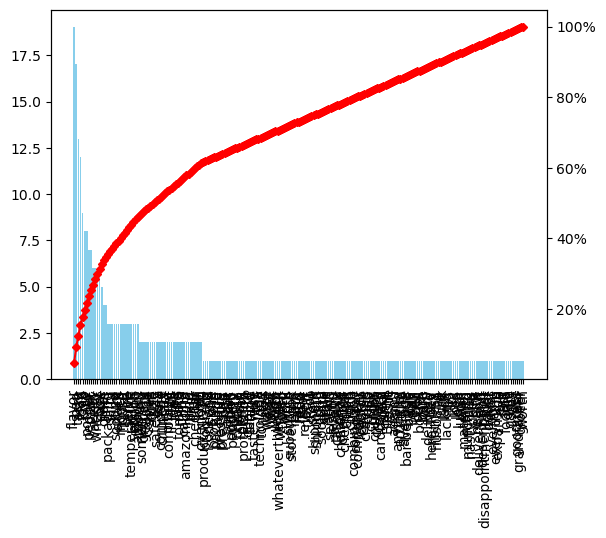

In [63]:
fig, ax=plt.subplots()
ax.bar(pareto_df.characteristics, pareto_df['count'],color='skyblue')
plt.xticks(rotation=90)
ax2=ax.twinx()
ax2.plot(pareto_df.characteristics, pareto_df['cumperc'], marker='D', ms=4, color='red')
ax2.yaxis.set_major_formatter(PercentFormatter())

In [64]:
pareto_df = pareto_df[pareto_df['count']>5]
pareto_df

characteristics  count    cumperc
1           flavor     19   4.822335
2              bag     17   9.137056
3            taste     13  12.436548
4             salt     12  15.482234
6             food      9  17.766497
7             chip      8  19.796954
8           potato      8  21.827411
9           pepper      7  23.604061
10            pack      7  25.380711
11             lot      6  26.903553
12         variety      6  28.426396
13         vinegar      6  29.949239
14             box      6  31.472081

In [65]:
pareto_df['cumperc'] = pareto_df['count'].cumsum()/pareto_df['count'].sum()*100
pareto_df

C:\Users\drdav\AppData\Local\Temp\ipykernel_50532\2269407073.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



characteristics  count     cumperc
1           flavor     19   15.322581
2              bag     17   29.032258
3            taste     13   39.516129
4             salt     12   49.193548
6             food      9   56.451613
7             chip      8   62.903226
8           potato      8   69.354839
9           pepper      7   75.000000
10            pack      7   80.645161
11             lot      6   85.483871
12         variety      6   90.322581
13         vinegar      6   95.161290
14             box      6  100.000000

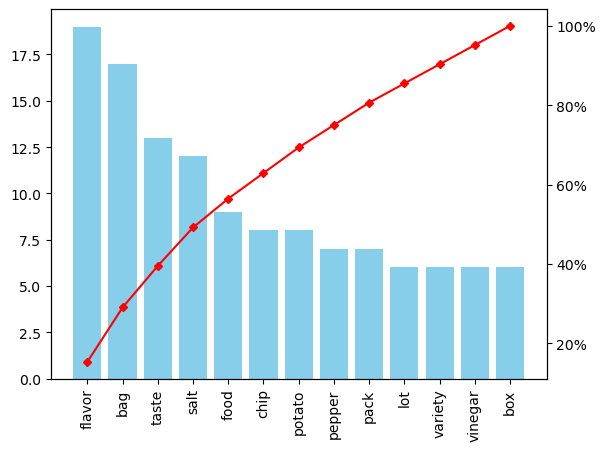

In [66]:
fig, ax=plt.subplots()
ax.bar(pareto_df.characteristics, pareto_df['count'],color='skyblue')
plt.xticks(rotation=90)
ax2=ax.twinx()
ax2.plot(pareto_df.characteristics, pareto_df['cumperc'], marker='D', ms=4, color='red')
ax2.yaxis.set_major_formatter(PercentFormatter())

In [71]:
Product_df[Product_df['Text'].str.contains('pack')]

Id   ProductId          UserId  \
7    413550  B0026KPDG8   A8E9ZAG5Y5RKH   
11   413554  B0026KPDG8  A2I18AO597DSDI   
39   413582  B0026KPDG8  A2YB7DLC3FOR7W   
41   413584  B0026KPDG8  A25IYR6TECWEBT   
44   413587  B0026KPDG8  A31Q59TUS9T6H0   
..      ...         ...             ...   
534  414077  B0026KPDG8  A3NZVCL9N8CLHB   
540  414083  B0026KPDG8  A2QSBOAAGW1I1H   
544  414087  B0026KPDG8   ARIZ8PY9ULPHH   
550  414093  B0026KPDG8  A2ZKS33N6Y3EPC   
551  414094  B0026KPDG8  A22DN96N5BEEMR   

                                           ProfileName  HelpfulnessNumerator  \
7                                           stephchows                     1   
11                      David Pearlman "sound fanatic"                     1   
39                           Pamela V "&#34;MS V&#34;"                     1   
41                                           B. Brazel                     1   
44                                       Marla Brugger                     1   
..                                                 ...                   ...   
534                                     Leo "Katphish"                     1   
540       Julie A. Dawson "Bards and Sages Publishing"                     1   
544  Bonnie Jo Davis "Loves to read and review books."                     1   
550                                     Tri Cao Nguyen                     1   
551                           J. L. BARBOSA "nursenut"                     1   

     HelpfulnessDenominator  Score        Time  \
7                         1      5  1283817600   
11                        1      4  1280707200   
39                        1      5  1266451200   
41                        1      5  1265760000   
44                        1      5  1264291200   
..                      ...    ...         ...   
534                       1      5  1327536000   
540                       1      4  1327449600   
544                       1      5  1327363200   
550                       1      3  1326412800   
551                       1      4  1326153600   

                                               Summary  \
7                                           Like crack   
11   A lower calorie alternative to standard chips:...   
39                                          Addictive!   
41                                 L O V E these chips   
44                                            AMAZING!   
..                                                 ...   
534                                         Addictive!   
540                                  A healthier snack   
544                   Holy Cow!! These Are Scrumptious   
550  Taste more like "Tomato and Basil" than "Chili...   
551                                        Good Choice   

                                                  Text    neg    pos    neu  \
7    These things are like crack, I can't stop eati...  0.000  0.363  0.637   
11   The eternal dieter's quest: A replacement for ...  0.060  0.177  0.763   
39   I purchased the variety pack based on other re...  0.000  0.217  0.783   
41   Can not find them locally yet. Much better tha...  0.000  0.264  0.736   
44   Can't believe they are only 100 calories a bag...  0.000  0.183  0.817   
..                                                 ...    ...    ...    ...   
534  I've never been a big fan on chips. When it co...  0.035  0.187  0.778   
540  We got the sweet potato flavor through the Vin...  0.064  0.211  0.725   
544  I didn't realize I was getting 20 packets of t...  0.022  0.330  0.648   
550  NOTE: This review is for the Chili and Lime Fl...  0.079  0.064  0.858   
551  I do enjoy most of the Popchip flavours.  This...  0.000  0.221  0.779   

     compound  
7      0.7889  
11     0.9958  
39     0.8820  
41     0.9370  
44     0.9525  
..        ...  
534    0.9957  
540    0.9800  
544    0.9931  
550   -0.3488  
551    0.6861  

[72 rows x 14 columns]

The significance of this distribution, especially with "pack" falling within the 80% mark (80-20 rule) according to the Pareto chart, can be interpreted in the context of prioritizing improvements or actions for addressing negative reviews. The Pareto principle, also known as the 80-20 rule, suggests that roughly 80% of effects come from 20% of causes. In the case of negative reviews, it implies that a small number of issues are responsible for the majority of dissatisfaction.

By analyzing the negative reviews and identifying the most frequently mentioned issues, such as "pack", "flavor," "bag," "taste," etc., businesses can pinpoint the key pain points experienced by customers.

With "pack" falling within the 80% mark, it signifies that addressing packaging-related issues could potentially resolve a significant portion of the overall negative sentiment. Therefore, efforts can be focused on improving packaging quality, convenience, or any other aspect related to the packaging experience.

Knowing that a few key issues contribute the most to negative feedback, businesses can allocate resources effectively by prioritizing initiatives aimed at addressing these specific concerns. This ensures that resources are utilized efficiently to tackle the most impactful problems first.

By addressing the identified issues, businesses can improve customer satisfaction levels and enhance the overall product experience. This, in turn, can lead to higher customer retention rates, as addressing customers' pain points demonstrates a commitment to quality and customer-centricity.

